<a href="https://colab.research.google.com/github/aeskandari68/Machine-Leaning/blob/main/Non_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

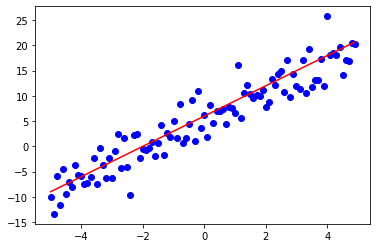

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = 3 * x + 6
y_noise = 3 * np.random.normal(size= x.size)
y_data = y + y_noise
# figure
plt.plot(x, y_data, 'bo')
plt.plot(x, y, 'r')
plt.show()

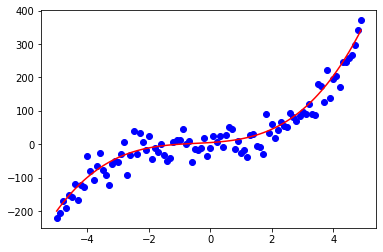

In [7]:
from numpy.core.fromnumeric import size
# try cubic function
y = 2*(x**3) + 3*(x**2) + 6*(x) + 5
y_noise = 30 * np.random.normal(size= x.size)
y_data = y + y_noise
# figure
plt.plot(x, y_data, 'bo')
plt.plot(x, y, 'r')
plt.show()

In [8]:
# fit non-linear model to china's GPD from 1960 to 2014
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2022-03-26 10:27:48 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


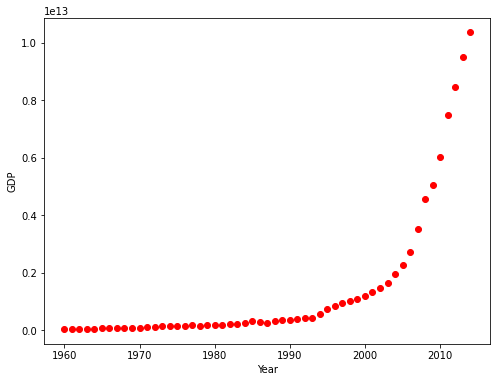

In [9]:
# plotting the dataset
plt.figure(figsize=(8,6))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [10]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [13]:
from scipy.optimize import curve_fit
def sigmoid(x, Beta1, Beta2):
  
    z = np.exp(-Beta1*(x-Beta2))
    sig = 1 / (1 + z)

    return sig
popt, pcov = curve_fit(sigmoid, xdata, ydata)

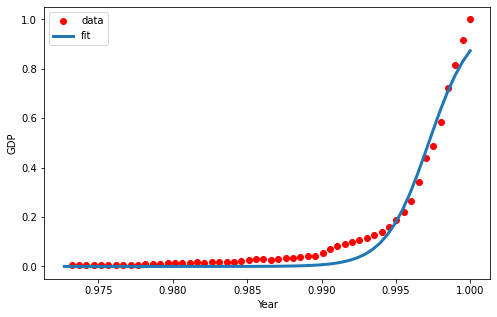

In [14]:
# Now we plot our resulting regression model.
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [24]:
# accuracy of the model
val = np.random.rand(len(df)) < 0.8
x_train = xdata[val]
x_test = xdata[~val]
y_train = ydata[val]
y_test = ydata[~val]


popt, pcov = curve_fit(sigmoid, x_train, y_train)
# predict values
yhat = sigmoid(x_test, *popt)

# evalution results
print("Mean Absolute Error: %2f" % np.mean(np.absolute(np.subtract(yhat, y_test))))
print("Residual sum of square (MSE): %2f" % np.mean(yhat - y_test) ** 2)
from sklearn.metrics import r2_score
print("R2-score: %2f" % r2_score(y_test, yhat))

Mean Absolute Error: 0.030755
Residual sum of square (MSE): 0.000946
R2-score: 0.964005
